## What is LARS?

Before we get into what lars is, we must take a peek into forward selection and forward stagewise regression. LARs treats each feature of the data as a vector and moves in a direction to minimizethe difference between its angle with equally likely features. For simplicity, we will be using a example of black friday shopping(featuring my ms paint skills). You are shopping on black friday since there is sale on everything. We are modelling your path as you buy these items: A keyboard, a mouse and a graphics card(in order of priority, graphics card is optional). Keyboard will be bought from best buy and the graphics card and cooling system will be bought from canada computers. The first part of this blog provides a intuitive explanation of how LARs operates, for actual example using code, quickly scroll to the bottom.

**Forward selection** is a selection method where in each step the model takes in the variable with highest correlation entirely and continues to predict. This is great, except when there are two correlated variables. In the case of multiple correlated variables, forward selection ends up ignoring the other ones, since after adding one of the correlated variable, the rest don't offer much explanation to the model anymore.

Here, you've gone into best buy to buy a keyboard, since it is your biggest concern. Since the mouse is highly likely to be found in best buy as well, forward selection will skip mouse and predict that you will go to canada computers next. Since it will skip the path inside best buy towards the mouse section, it won't be as accurate. 

![](https://i.imgur.com/bnlSHBX.jpg)

**Forward stagewise regression** on the other hand, solves this problem by only adding a predetermined amount of a variable. Since it doesn't add the entirity of a variable, other correlated variables are still considered and added in accordingly. But due to the process, forward stagewise ends up being very inefficient when there are a lot of variables to consider.

In this case, our model is being very cautious of your path and updating it every step at a time. Since you are likely to go into best buy to find keyboard first, it will predict your path to best buy one step at a time. At every step it will reevaluate whether you are closer to the store for keyboard, mouse or graphics card, and update its path accordingly. This is great, since this time around the model will be more accurate in its prediction. But if we had 50 things in our list, this model would quickly become burdensome, having to calculate at each step. 

![](https://i.imgur.com/DeW8EPm.jpg)

LARS or **Least Angle Regression** aims to solve the limitation of both of the previously mentioned methods. Instead of moving in small predetermined amounts of a variable, it hops towards the most correleated variable until another variable becomes just as correlated. At this stage it changes direction in a way that it forms equal angles(equal correlation) with each variable. Thus the name, least angle regression.

In case of LARS, we will be keeping mouse and graphics card as well, but this time we will modelling our path towards best buy for the keyboard, until we reach best buy. At best buy, buying both mouse and keyboard are equally likely to be bought, so the model will predict a path equally distant from the mouse section and the keyboard. So if you decide to buy the mouse first and then the keyboard, the models path will be a closer approximation than a model that only predicts your path to keyboard. Afterward buying the keyboard and the mouse you're equally likely to go to home or to canada computers. The model will continue to model a equidistant path for your home and canada computers. Since the path revision only happens when two variables becaome equally correlated, it's more accurate than forward selection and lighter/more efficient than forward stagewise regession.

![](https://i.imgur.com/zHUrPyv.jpg)

This may sound similar to Lasso, which it is, since Lasso operates in a similar way. The difference in Lasso is that it drops a variable once its prediction capacity hits zero. LARS can be modified slightly to achieve both the effects of Lasso and forward stagewise regression.

## When do we use LARS

As much as understanding what LARS method is helps us, we are obviously more interested in when to use it. Since LARS is very similar to Lasso and forward stagewise, often times they will produce similar if not same results. In general, LARS is picked over forward stagewise when there is a large number of variables to account for. The decision between lars and lasso seems more dataset dependant, so it is recommended that both methods are tested before using one.
If we head over to [W3Cschool](https://www.w3cschool.cn/doc_scikit_learn/scikit_learn-modules-linear_model.html?lang=en#least-angle-regression), we'll find that the strengths of LARs model are:

+ LARs is very useful in cases where the number of features are greater than the number of points available for analysis.
+ It is as efficient as forward selection, with similar order of complexity as ordinary least squares method.
+ As mentioned before, LARS can be easily modified to function similar to other methods such as Lasso.
+ Intuitively thinking, if two variables correlate to the prediction equally, the prediction should weigh them equally. In that sense, LARs makes intuitive sense as it increases their coefficients by the same amounts.

However, LARs is based on iterative operations, making it especially susceptible to noise.


## How do we use it

If we go to the sklearn [docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lars.html), we will find:

*sklearn.linear_model.Lars(fit_intercept=True, verbose=False, normalize=True, precompute=’auto’, n_nonzero_coefs=500, eps=2.220446049250313e-16, copy_X=True, fit_path=True, positive=False)*

no arguments are required for lars, but you can:

**fit_intercept**: default = False

Takes boolian values. Default value is false, meaning no intercept will be calculated or used in calculations. Data is expected to be centred.

**normalize**: default= True

normalizes data when fit_intercept is set to true. For standardized data, use sklearn.preprocessing.StandardScaler before calling lars with normalize = False.

**precompute**: True, False, 'auto', array(gram matrix)

Gram matrix is helpful for determining the linear independance, where the set of vectors are linearly independant if and only if the determinnat of Gram matric is non-zero(source: Horn, Roger A.; Johnson, Charles R. (2013). "7.2 Characterizations and Properties". Matrix Analysis (Second Edition). Cambridge University Press. ISBN 978-0-521-83940-2).

**copy_X**: default = True

Works on a copy of X. If set to false, the original datset may be overwritten.

**fit_path**: default = True

copies the entire path to coeff_path. Setting value to false helps speed up process for large datasets, especially with a small *alpha*.

For more, check out the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lars.html)!

**Methods**

fit(X, y)

fits the model using given X, y training data

predict(X)

returns prediction values based on the model

score(X, y)	

returns r2 score of prediction


Now that we know the formula, let's see LARs in action!

In [29]:
# imports
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
# from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

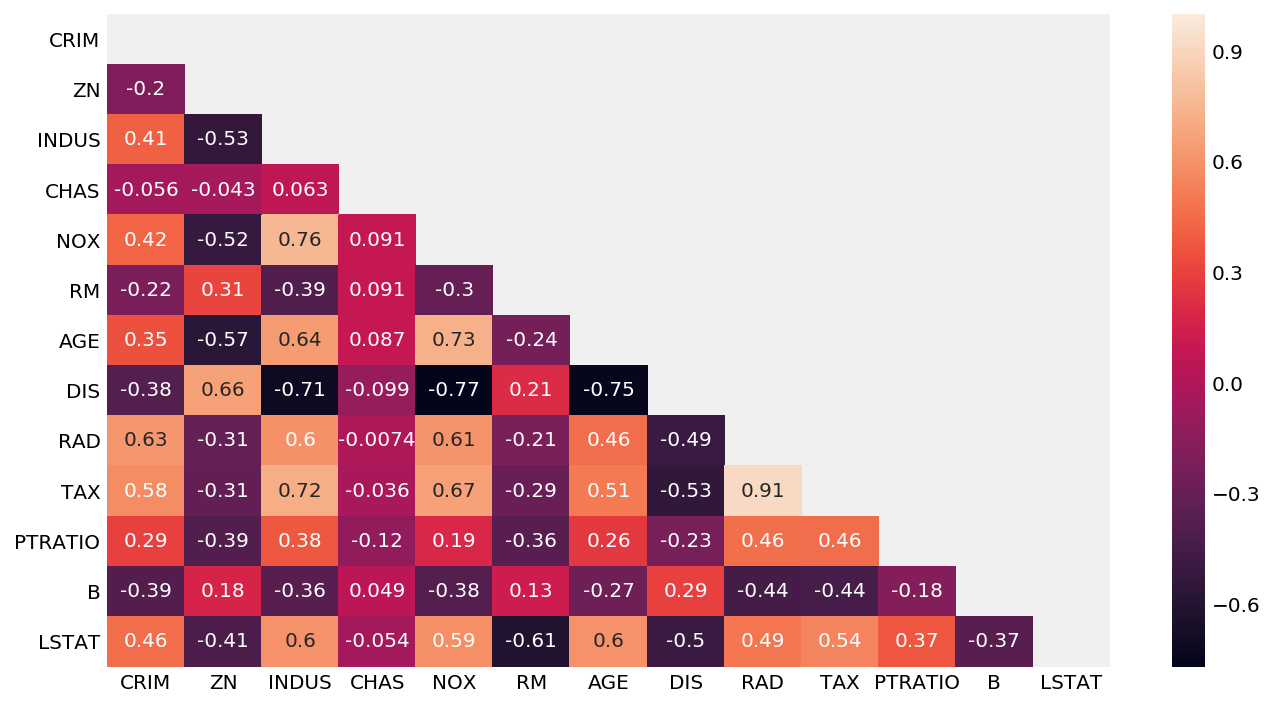

In [3]:
# heat map for a general correlation overview
plt.figure(figsize = (10,6))
mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X.corr(), mask = mask, annot = True);

For this example, we are going to use RM, LSTAT, PTRATIO, CHAS and INDUS columns to predict target.

In [4]:
# train test split
X_new = pd.DataFrame([X.RM, X.LSTAT, X.PTRATIO, X.INDUS, X.CHAS])
X_new = X_new.T
X_train, X_test, y_train, y_test = train_test_split(X_new.values, y, test_size=0.7, random_state=42)

In [5]:
# imports
from sklearn.linear_model import Lars
from sklearn.linear_model import LarsCV
from sklearn.linear_model import lars_path
from sklearn.metrics import r2_score

In [11]:
# Generate predictions in lars cv
lars_model = LarsCV(cv = 5)
lars_model = lars_model.fit(X_train, y_train)
lars_model_preds = lars_model.predict(X_test)
lars_model_preds_train = lars_model.predict(X_train)

# Evaluate model.
print(r2_score(y_test, lars_model_preds))
print(r2_score(y_train, lars_model_preds_train))

0.6609112437642655
0.7244596309093461


From the values above, we can see that our model is predicting the train set better than the actual data in train set. To not overfit like we are doing right now, we need to take off some of the features and see if the model works better. So we will call the coefficients for the lars model and see which features should be taken off.

In [7]:
# get the coeff so we can select features
lars_model.coef_

array([ 5.26082253, -0.49471453, -0.98458849,  0.        ,  4.2806216 ])

Let's try this model again, without the PTRATIO and INDUS features.

In [27]:
# train test split
X_new = pd.DataFrame([X.RM, X.LSTAT, X.CHAS])
X_new = X_new.T
X_train, X_test, y_train, y_test = train_test_split(X_new.values, y, test_size=0.7, random_state=42)

In [28]:
# actual lars cv code
lars_model = LarsCV(cv = 5)
lars_model = lars_model.fit(X_train, y_train)
lars_model_preds = lars_model.predict(X_test)
lars_model_preds_train = lars_model.predict(X_train)

# Evaluate model.
print(r2_score(y_test, lars_model_preds))
print(r2_score(y_train, lars_model_preds_train))

0.6281183361898083
0.6736160473390879


In [ ]:
The feature selection through larscv has helped us with overfitting in this case.